# Problem Statement
In this Jupyter Notebook, we will apply a K-Means Clustering algorithm on the output of a Classification and/or Regression algorithm. 
We will start with a small "proof-of-concept", where we apply K-Means clustering on the test data generated from a Wine dataset.
The purpose of this research is to investigate which errors occur disproportionately more in clusters comprising instances with demographic attributes, such as age, gender and income. This could indicate that the classification/regression algorithm underperforms for these groups, hereby indicating discriminating behaviour.

Furthermore, this study is inspired by the following paper: https://bit.ly/3g2pAmT (the Bias-Aware Hierarchical K-Means Clustering algorithm). 

### 1. Preprocessing the dataset
We start with creating the dataset through applying a classification or regression algorithm on the data to generate the desired input for the clustering analysis. 
Our input for the clustering algorithm has the following components:
- The test data in a Pandas DataFrame: the instances with their features 
- The ground truth labels (for a classification model) or values (for a regression model)
- The predicted classes/values per instance
- The errors of the model per instance, which can be calculated from (truth label - predicted label)

### Step 2: Applying the K-Means Clustering
The second step is to apply K-Means Clustering on this dataset to group similar errors into clusters. The cluster with the highest error rate will then be further investigated.

### Step 3. 

 



# 1. Preprocessing the dataset
 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import seaborn as sns

In [45]:
from sklearn.datasets import load_wine

data = load_wine()
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data = data.target)

# Dividing X and y into train and test data (small train data to gain more errors)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.40, random_state=2)

# Training a RandomForest Classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Obtaining predictions
y_hat = model.predict(X_test)

# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted class'] = y_hat.tolist()
predictions_col['true class'] = y_test
predictions_col['errors'] = abs(predictions_col['true class'] - predictions_col['predicted class'])

# rescaling the prediction errors with max error value of 1
predictions_col['errors'].replace(2.0, 1.0)
# predictions_col['errors'] =  abs(if(predictions_col['true classes'] - predictions_col['predictions']) != 0) 

# adding predictions to test data
df_out = pd.merge(X_test, predictions_col, left_index = True, right_index = True)
df_out

<ipython-input-45-4026867c2d05>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
12    13.75        1.73  2.41               16.0       89.0           2.60   
23    12.85        1.60  2.52               17.8       95.0           2.48   
25    13.05        2.05  3.22               25.0      124.0           2.63   
35    13.48        1.81  2.41               20.5      100.0           2.70   
13    14.75        1.73  2.39               11.4       91.0           3.10   
65    12.37        1.21  2.56               18.1       98.0           2.42   
48    14.10        2.02  2.40               18.8      103.0           2.75   
3     14.37        1.95  2.50               16.8      113.0           3.85   
6     14.39        1.87  2.45               14.6       96.0           2.50   
42    13.88        1.89  2.59               15.0      101.0           3.25   
2     13.16        2.36  2.67               18.6      101.0           2.80   
29    14.02        1.68  2.21               16.0       96.0           2.65   
45    14.21        4.04  2.44               18.9      111.0           2.85   
5     14.20        1.76  2.45               15.2      112.0           3.27   
53    13.77        1.90  2.68               17.1      115.0           3.00   
41    13.41        3.84  2.12               18.8       90.0           2.45   
54    13.74        1.67  2.25               16.4      118.0           2.60   
24    13.50        1.81  2.61               20.0       96.0           2.53   
64    12.17        1.45  2.53               19.0      104.0           1.89   
28    13.87        1.90  2.80               19.4      107.0           2.95   
14    14.38        1.87  2.38               12.0      102.0           3.30   
44    13.05        1.77  2.10               17.0      107.0           3.00   
66    13.11        1.01  1.70               15.0       78.0           2.98   
57    13.29        1.97  2.68               16.8      102.0           3.00   
71    13.86        1.51  2.67               25.0       86.0           2.95   
11    14.12        1.48  2.32               16.8       95.0           2.20   
36    13.28        1.64  2.84               15.5      110.0           2.60   
62    13.67        1.25  1.92               18.0       94.0           2.10   
0     14.23        1.71  2.43               15.6      127.0           2.80   
27    13.30        1.72  2.14               17.0       94.0           2.40   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
12        2.76                  0.29             1.81             5.60  1.15   
23        2.37                  0.26             1.46             3.93  1.09   
25        2.68                  0.47             1.92             3.58  1.13   
35        2.98                  0.26             1.86             5.10  1.04   
13        3.69                  0.43             2.81             5.40  1.25   
65        2.65                  0.37             2.08             4.60  1.19   
48        2.92                  0.32             2.38             6.20  1.07   
3         3.49                  0.24             2.18             7.80  0.86   
6         2.52                  0.30             1.98             5.25  1.02   
42        3.56                  0.17             1.70             5.43  0.88   
2         3.24                  0.30             2.81             5.68  1.03   
29        2.33                  0.26             1.98             4.70  1.04   
45        2.65                  0.30             1.25             5.24  0.87   
5         3.39                  0.34             1.97             6.75  1.05   
53        2.79                  0.39             1.68             6.30  1.13   
41        2.68                  0.27             1.48             4.28  0.91   
54        2.90                  0.21             1.62             5.85  0.92   
24        2.61                  0.28             1.66             3.52  1.12   
64        1.75                  0.45             1.03            

In [46]:
## Exploring the statistics of the dataset

df_out.describe()

alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  30.000000   30.000000  30.000000          30.000000   30.000000   
mean   13.644333    1.873333   2.446333          17.403333  101.833333   
std     0.607923    0.622544   0.290119           2.934278   11.104778   
min    12.170000    1.010000   1.700000          11.400000   78.000000   
25%    13.282500    1.647500   2.335000          15.700000   95.000000   
50%    13.745000    1.765000   2.445000          17.000000  101.000000   
75%    14.115000    1.900000   2.605000          18.800000  109.250000   
max    14.750000    4.040000   3.220000          25.000000  127.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      30.000000   30.000000             30.000000        30.000000   
mean        2.753333    2.833000              0.303333         1.850667   
std         0.396305    0.485245              0.068949         0.502167   
min         1.890000    1.750000              0.170000         0.730000   
25%         2.507500    2.620000              0.260000         1.582500   
50%         2.725000    2.825000              0.290000         1.835000   
75%         2.995000    3.150000              0.335000         2.067500   
max         3.850000    3.690000              0.470000         2.960000   

       color_intensity        hue  od280/od315_of_diluted_wines      proline  \
count        30.000000  30.000000                     30.000000    30.000000   
mean          5.095667   1.087667                      3.112333  1030.900000   
std           1.166021   0.141949                      0.424408   304.916761   
min           2.950000   0.860000                      2.230000   355.000000   
25%           4.335000   1.022500                      2.825000   881.250000   
50%           5.170000   1.080000                      3.165000  1060.000000   
75%           5.670000   1.165000                      3.437500  1277.500000   
max           7.800000   1.450000                      3.920000  1547.000000   

       predicted class  true class     errors  
count        30.000000   30.000000  30.000000  
mean          0.933333    0.166667   0.833333  
std           0.868345    0.379049   0.746640  
min           0.000000    0.000000   0.000000  
25%           0.000000    0.000000   0.000000  
50%           1.000000    0.000000   1.000000  
75%           2.000000    0.000000   1.000000  
max           2.000000    1.000000   2.000000

<AxesSubplot:xlabel='proline', ylabel='proanthocyanins'>

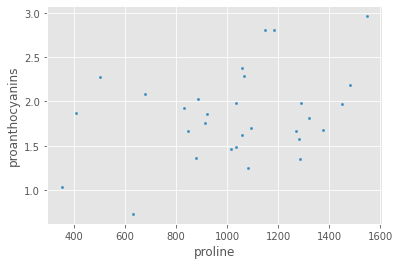

In [47]:
# Exploring the data
df_out.plot.scatter(x='proline', y='proanthocyanins', s=5)


## Should we now rescale all the features? This is usually a preprocessing step for clustering

# Clustering 
Sources:

- https://www.youtube.com/watch?v=ZueoXMgCd1c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=35&ab_channel=sentdex
- https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/?# 

## K-Means Clustering
K is the hyperparameter that defines how many clusters there will be formed in the cluster space. When you take K=2, then the data will be grouped into two clusters. 
When we have k=2, we have two centroids. We calculate the distance between the datapoints and the centroids. We assign each datapoint to the centroid that is closest. 
The centroids are randomly chosen and we classify the datapoints as being part of either cluster 1 or cluster 2. 
Then, we calculate the mean of all datapoints in cluster 1 and cluster 2 and we define the new centroid. 
Once the centroids are not moving anymore, we have the final centroids.
We also have a tolerance and a max_iteration parameter. 

Downside K-means: 
* It clusters the data in groups of roughly the same size. So you can't have three clusters in different sizes.
* Scaling 

Clustering is mostly used to find a certain pattern in the data rather than accuracy or visualisation purposes. 


In [35]:
# App
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans


In [25]:
# Checking whether the SciKit KMeans is applicable on the PD Dataframe
# source: https://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering 

# Converting df to matrix 
matrix_form = df_out.values
df_matrix = matrix_form # should I transpose this? Then i'd get a list per feature 
print (df_matrix) 



[[ 1.375e+01  1.730e+00  2.410e+00  1.600e+01  8.900e+01  2.600e+00
   2.760e+00  2.900e-01  1.810e+00  5.600e+00  1.150e+00  2.900e+00
   1.320e+03  0.000e+00  0.000e+00  0.000e+00]
 [ 1.285e+01  1.600e+00  2.520e+00  1.780e+01  9.500e+01  2.480e+00
   2.370e+00  2.600e-01  1.460e+00  3.930e+00  1.090e+00  3.630e+00
   1.015e+03  1.000e+00  0.000e+00 -1.000e+00]
 [ 1.305e+01  2.050e+00  3.220e+00  2.500e+01  1.240e+02  2.630e+00
   2.680e+00  4.700e-01  1.920e+00  3.580e+00  1.130e+00  3.200e+00
   8.300e+02  0.000e+00  0.000e+00  0.000e+00]
 [ 1.348e+01  1.810e+00  2.410e+00  2.050e+01  1.000e+02  2.700e+00
   2.980e+00  2.600e-01  1.860e+00  5.100e+00  1.040e+00  3.470e+00
   9.200e+02  1.000e+00  0.000e+00 -1.000e+00]
 [ 1.475e+01  1.730e+00  2.390e+00  1.140e+01  9.100e+01  3.100e+00
   3.690e+00  4.300e-01  2.810e+00  5.400e+00  1.250e+00  2.730e+00
   1.150e+03  2.000e+00  0.000e+00 -2.000e+00]
 [ 1.237e+01  1.210e+00  2.560e+00  1.810e+01  9.800e+01  2.420e+00
   2.650e+00  3.7

In [32]:
# Applying Sklearn
clf = KMeans(n_clusters=2)
clf.fit(df_matrix)
centroids = clf.cluster_centers_
labels = clf.labels_
print(labels)

[0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0]


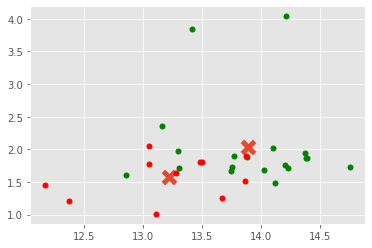

In [27]:
# defining the colors of the clusters
colors = ["g.", "r.", "c.", "b.", "k.", "o."]

for i in range(len(df_matrix)):
    plt.plot(df_matrix[i][0], df_matrix[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:, 0], centroids[:,1], marker='x', s=150, linewidths=5)
plt.show()

In [30]:
# Save cluster results in a Pandas DF
cluster_results = pd.DataFrame([matrix_form.index, labels]).T # doesn't work

AttributeError: 'numpy.ndarray' object has no attribute 'index'